# Milestone 1: Financial Crisis Analysis


## Part 1: Data Analysis Part

### Tableu Link:
https://public.tableau.com/app/profile/bramantyo.anandaru.suyadi/viz/AGG_stock_bram/Dashboard1?publish=yes

### Introduction
- Name: Bramantyo Anandaru Suyadi
- Batch: HCK-023
- Objective: Through this project, I want to analyze how the financial crisis in 2008 affects an oil & gas firm

### Problem Identification
#### Topic of the Problem: Financial Crisis of 2008
#### Background:
The financial crisis of 2008 started because banks and financial institutions are lending cheap credits and a low-binding lending policy towards high risk borrowers. The chronology goes like this: Home prices began to fall in early 2006, then subprime lenders were filing for bankruptcy in early 2007. This loss caused a panic that froze the global lending system in August 2007. At its peak in September 2008, Lehman Brothers collapsed in the biggest US bankruptcy ever recorded.  (Singh, 2024)

The 2008 financial crisis produced a negative impact on the oil and gas industry as it caused a steep decline in oil prices and a contraction in credit. This economic decline causes failing revenues for this particular industry. The Great Recession that followed sent the price of a barrel of crude oil from $133.88 to $39.09 in just less than a year. (THE INVESTOPEDIA TEAM, 2022)

The company that I will be analysing as a financial analyst is AGG Power Solutions, a multinational company focused on the design, manufacture and distribution of power generation systems and advanced energy solutions. (AGG POWER, n.d.)

#### SMART FRAMEWORK
- Specific: Analyzing the impact of the financial crisis to AGG Power Solutions.
- Measurable: Analyze the stock trend between 2 years before the financial crisis (2005-2006), during the financial crisis(2007-2008), and 2 years after (2009-2010) 
- Achievable: Creating a different dataset for each 2 years that will be analyzed, create visualization based on those samples and population, and analyze the differences in prices between those periods with inferential statistics.
- Relevance: Having those different datasets with different visualization and statistics will help us to analyze the impact of 2008 financial crisis to AGG by seeing how the company performs 2 years before, 2 years during, and 2 years after. 
- Time: The research that is being undergone is expected to be finished within a week

#### Problem Statement: 
The goal of this analysis is to examine the effect of the financial crisis on an energy company known as AGG Power Solution by creating 3 different datasets every 2 years before, during, and after the financial crisis. After analyzing the data, we can identify how the crisis affects the company financially in a span of a week.

Another objective is to predict how the stock will look like 1 year after the 2 year recovery period (2009-2010)



#### List of Questions:
1. What does the company look like in 6 years overall?
2. What did the company look like 2 years before the crisis? 
3. What does the company look like 2 years during the crisis?
4. During that time, which quarter and which year is the worst for the company so that we know when to buy or sell during crisis? 
5. What does the company look like 2 years after the crisis? 
6. Are there any correlation between trade volume and closing price?
7. Compare the difference of performance of those years and write the conclusion!
8. Bonus Part 2: Predict how the stock price will look like a year from the recovery period and compare it with the actual value

#### References
- AGG POWER. (n.d.). About AGG Power. AGG Power. Retrieved November 20, 2024, from https://www.aggpower.com/about-agg-power/
THE INVESTOPEDIA TEAM. (2022, September 28). 
- How did the 2008 financial crisis affect the oil and gas sector? Investopedia. Retrieved November 20, 2024, from https://www.investopedia.com/ask/answers/052715/how-did-financial-crisis-affect-oil-and-gas-sector.asp
- Singh, M. (2024). The 2008 Financial Crisis Explained. Investopedia. Retrieved November 15, 2024, from https://www.investopedia.com/articles/economics/09/financial-crisis-review.asp



### Data Loading

Source of data:
`https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs?resource=download`

#### Data Exploration

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

C:\Users\daru1\AppData\Local\Temp\ipykernel_768\3043222351.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Here, we first must import all the necessary modules to analyze this dataset

In [2]:
df = pd.read_csv('milestone_stock.csv')
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,86.493,86.516,86.295,86.516,78933,0
1,2005-02-28,86.516,86.534,86.163,86.287,425148,0
2,2005-03-01,85.846,86.050,85.846,85.985,147700,0
3,2005-03-02,85.779,86.016,85.779,85.874,202052,0
4,2005-03-03,86.060,86.069,85.732,85.943,142621,0
...,...,...,...,...,...,...,...
3196,2017-11-06,109.560,109.590,109.460,109.550,1292977,0
3197,2017-11-07,109.580,109.610,109.490,109.580,2015511,0
3198,2017-11-08,109.540,109.600,109.460,109.510,2738802,0
3199,2017-11-09,109.390,109.460,109.300,109.430,2470740,0


Loading up the entire dataset to ensure it is appropripriate to use

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3201 non-null   object 
 1   Open     3201 non-null   float64
 2   High     3201 non-null   float64
 3   Low      3201 non-null   float64
 4   Close    3201 non-null   float64
 5   Volume   3201 non-null   int64  
 6   OpenInt  3201 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 175.2+ KB


Checking to see if all the columns are adjusted accordingly, here we see that the 'Date' is still categorized as object, not datetime

### Data Cleaning

#### 1. Changing the 'Date' datasets into datetime datatype from object

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3201 non-null   datetime64[ns]
 1   Open     3201 non-null   float64       
 2   High     3201 non-null   float64       
 3   Low      3201 non-null   float64       
 4   Close    3201 non-null   float64       
 5   Volume   3201 non-null   int64         
 6   OpenInt  3201 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 175.2 KB


This step is crucial, because we want to extract this later

#### 2. Extracting the year from the 'Date' column

In [5]:
df['year'] = df['Date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3201 non-null   datetime64[ns]
 1   Open     3201 non-null   float64       
 2   High     3201 non-null   float64       
 3   Low      3201 non-null   float64       
 4   Close    3201 non-null   float64       
 5   Volume   3201 non-null   int64         
 6   OpenInt  3201 non-null   int64         
 7   year     3201 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2)
memory usage: 187.7 KB


Extracting year will allow us to specifically access the data for this year

#### 3. Extracting quarter from the 'Date' column

In [6]:
df['quarter'] = df['Date'].dt.quarter
df['quarter']

0       1
1       1
2       1
3       1
4       1
       ..
3196    4
3197    4
3198    4
3199    4
3200    4
Name: quarter, Length: 3201, dtype: int32

Because we want to analyze a specific quarter, this step is necessary

#### 4. From the datset loaded, the 'OpenInt' seems to be null or only has one value

In [7]:
df['OpenInt'].unique()

array([0], dtype=int64)

Because it only has one value, which is 0, I will consider it null because it will be of no use for analysis. Open interest is the total number of futures contracts held by market participants at the end of the trading day. It is used as an indicator to determine market sentiment and the strength behind price trends. However, because it is zero, we cannot use it. Hence, I will just drop it

#### 5. Droping the column 'OpenInt'

In [8]:
del df['OpenInt']

#### 6. Extracting the population and the sample dataset that will be used

In [9]:
population = df[df['year'].isin([2005,2006, 2007, 2008, 2009, 2010])]
before = df[df['year'].isin([2005,2006])]
during = df[df['year'].isin([2007,2008])]
after = df[df['year'].isin([2009,2010])]

Here we are creating the population and samples

#### 7. Making sure all the necessary columns are inside

In [10]:
population.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'year', 'quarter'], dtype='object')

Ensuring that only the necessary columns are inside the data

### Analysis

#### 1. Analysis of the 6 years overall performance

To analyze the stock, first I need to see the descriptive statistics of the population that I am taking from the dataset. 


In [11]:
print(population['Close'].describe())
print("Skewness:", population['Close'].skew())
print("Kurtosis:", population['Close'].kurtosis())

count    1474.000000
mean       85.819534
std         2.406976
min        74.626000
25%        84.287250
50%        85.353000
75%        87.127000
max        92.201000
Name: Close, dtype: float64
Skewness: 0.5322446778607238
Kurtosis: 0.5546466967242467


From the population distribution statistics, we can see that it is not normally distributed.

Of course, the statistics may not be enough to interpret anything. Hence, we are going to use line graph to see the trend of this company stock. 

In [ ]:
fig = px.line(population, x="Date", y="Close",  
              title='Closing Price')
fig.show()

As we can see, there is a huge dip in closing price between in the year of 2008. This is during the financial crisis

We are going to do the same for the volume, describe the statistics and graph the data (but we are using bar right now). 

In [13]:
print(population['Volume'].describe())
print("Skewness:", population['Volume'].skew())
print("Kurtosis:", population['Volume'].kurtosis())

count    1.474000e+03
mean     5.745331e+05
std      4.419628e+05
min      3.686600e+04
25%      2.623758e+05
50%      5.143810e+05
75%      7.447785e+05
max      4.181144e+06
Name: Volume, dtype: float64
Skewness: 2.690750558696263
Kurtosis: 13.560712759002502


Distribution-wise, the data is also rightly skewed so it is not normally distributed

<Axes: xlabel='year', ylabel='Volume'>

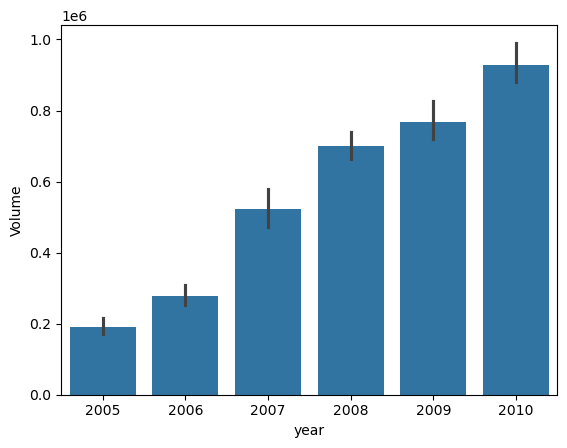

In [14]:
sns.barplot(data=population,x='year', y='Volume')

From the bar, we can see an increasing trend of trading volume for this company stock.

The reason I use bar for the volume is to have better visualization since unlike stock price, trading volume has higher volatility and will vary between each day

#### 2. Prices before crisis

Now I am going to see how the company is doing financially 2 years pre-crisis, by seeing only its closing price. 

count    466.000000
mean      84.670315
std        1.300922
min       81.814000
25%       83.777500
50%       84.698000
75%       85.777000
max       87.298000
Name: Close, dtype: float64
Skewness: -0.11962275340992895
Kurtosis: -0.8391049049100054


<Axes: >

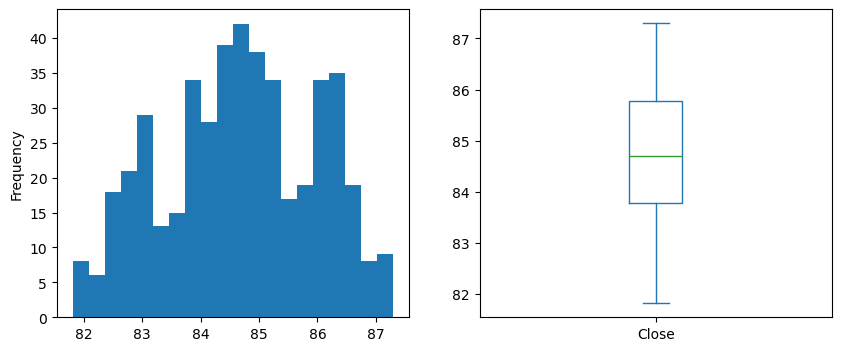

In [15]:
print(before['Close'].describe())
print("Skewness:", before['Close'].skew())
print("Kurtosis:", before['Close'].kurtosis())

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

before['Close'].plot(kind='hist',bins=20,ax=ax[0])
before['Close'].plot(kind='box',ax=ax[1])


The sample data as we see is not as skewed as the whole population and rather have considerably normal distribution

In [ ]:
fig = px.line(before, x="Date", y="Close",  
              title='Closing Price')
fig.show()

The trend seems to be going down from 2005 to the middle of 2006. After that, the price seems to have gone back up since then.

#### 3. Prices during crisis

And now, I am going to see their prices during crisis

count    504.000000
mean      84.513740
std        1.592928
min       74.626000
25%       83.908000
50%       84.540500
75%       85.481000
max       87.973000
Name: Close, dtype: float64
Skewness: -1.1226503228505587
Kurtosis: 3.9523561132935265


<Axes: >

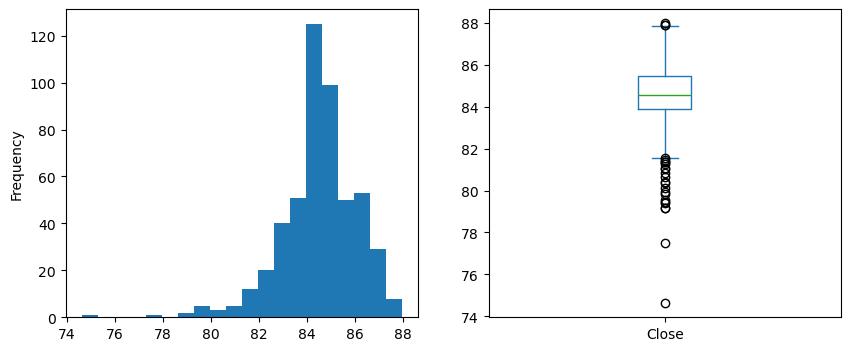

In [17]:
print(during['Close'].describe())
print("Skewness:", during['Close'].skew())
print("Kurtosis:", during['Close'].kurtosis())

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

during['Close'].plot(kind='hist',bins=20,ax=ax[0])
during['Close'].plot(kind='box',ax=ax[1])

It has a huge number of outlier as we can see from the skewness, so it is not normally distributed

In [18]:
fig = px.line(during, x="Date", y="Close",  
              title='Closing Price')
fig.show()

There seems to be a huge dip in the year of 2008, but a significant increase after that dip.

#### 4. The right time to buy or sell the stock

Now I have found that the year of 2008 is the year where the stock is at its lowest closing price, while also having the highest price. So, we will filter the data for the year of 2008:

In [19]:
filtered_data2008 = during[during['year']==2008]

And filter the specific quarter in which it has both the lowest and highest. In this case it's the 4th quarter

In [20]:
filtered_data2008_quart4 = filtered_data2008[filtered_data2008['quarter']==4]

In [21]:
fig = go.Figure(data=[go.Candlestick(x=filtered_data2008_quart4['Date'],
                open=filtered_data2008_quart4['Open'],
                high=filtered_data2008_quart4['High'],
                low=filtered_data2008_quart4['Low'],
                close=filtered_data2008_quart4['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

As we can see here, the best time to invest is specifically on 4th quartile of year 2008

#### 5. Prices 2 years after crisis

Now, we want to graph out the prices 2 years after the crisis


count    504.000000
mean      88.187899
std        2.076451
min       84.257000
25%       86.444000
50%       88.143000
75%       89.409500
max       92.201000
Name: Close, dtype: float64
Skewness: 0.16744906709890744
Kurtosis: -0.8327217364485233


<Axes: >

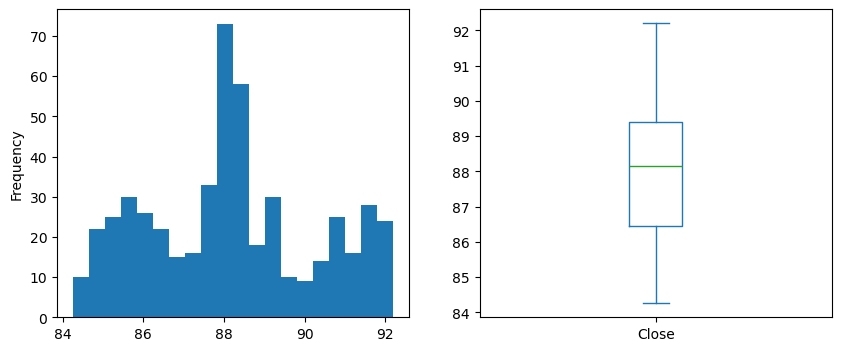

In [22]:
print(after['Close'].describe())
print("Skewness:", after['Close'].skew())
print("Kurtosis:", after['Close'].kurtosis())

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

after['Close'].plot(kind='hist',bins=20,ax=ax[0])
after['Close'].plot(kind='box',ax=ax[1])

Distribution wise, the data is fairly distributed.

In [ ]:
fig = px.line(after, x="Date", y="Close",  
              title='Closing Price')
fig.show()

From the closing price, we have seen an increasing trend after the crisis. We would usually call this the recovery period.

#### 6. Correlation between trading volume and closing price

A question has appeared in my head as an analyst, does trade volume affect the prices? 
Here I am going to analyze their correlation in different contexts: 
- Entire dataset analysis
- Entire population analysis
- Sample of data during crisis


Because the distribution for the volume is not normal, we will perform spearman test for these three conditions.

Entire dataset analysis

In [24]:
corr_rho, pval_s = stats.spearmanr(df['Volume'], df['Close'])
print(f"Dataset rho-correlation: {corr_rho:.2f}, Dataset p-value: {pval_s}")

Dataset rho-correlation: 0.79, Dataset p-value: 0.0


For the entire dataset, there is a significant positive correlation between trading volume and closing price. So with an increase of 1 in volume, there will be an increase of 0.79 to the closing price.

Entire population analysis

In [25]:
corr_rho, pval_s = stats.spearmanr(population['Volume'], population['Close'])
print(f"Population rho-correlation: {corr_rho:.2f}, Population p-value: {pval_s}")

Population rho-correlation: 0.39, Population p-value: 4.482401016696956e-56


As for the entire population, there is a significant positive correlation between trading volume and closing price. So with an increase of 1 in volume, there will be an increase of 0.39 to the closing price.

In [26]:
corr_rho, pval_s = stats.spearmanr(during['Volume'], during['Close'])
print(f"Stock rho-correlation during crisis: {corr_rho:.2f}, Stock p-value during: {pval_s}")

Stock rho-correlation during crisis: 0.15, Stock p-value during: 0.0007550235551775387


For the data sample during crisis, there is a significant positive correlation between trading volume and closing price. So with an increase of 1 in volume, there will be an increase of 0.15 to the closing price.

we have seen a strong correlation between the two, so I advise we consider trade volume of the stock as a component to decide whether to invest in this stock or not

#### 7. Comparison of the closing prices in 3 different period

Now I am going to compare the prices of the closing price before, during, and after the crisis. To do this, I have to do two way testing one by one

In [27]:
before_during = stats.ttest_ind(before['Close'],during['Close'])
during_after = stats.ttest_ind(during['Close'],after['Close'])
before_after = stats.ttest_ind(before['Close'],after['Close'])

Prices before vs during crisis
- H0: There is no difference in prices before and during the crisis
- H1: There is difference in prices before and during the crisis

In [28]:
print("before vs during crisis:", before_during)

before vs during crisis: TtestResult(statistic=1.668797178834071, pvalue=0.09548095151896648, df=968.0)


From the t-test, I find weak evidence to reject the H0. I conclude that there is not much difference of prices between before or after crisis.

Prices during vs after crisis
- H0: There is no difference in prices during and after the crisis
- H1: There is difference in prices during and after the crisis

In [29]:
print("during vs after crisis:", during_after)

during vs after crisis: TtestResult(statistic=-31.517906787261033, pvalue=3.225403927857345e-152, df=1006.0)


From the t-test, I find strong evidence to reject H0. I conclude that there is significant difference between prices during and after crisis.

Prices before vs after crisis
- H0: There is no difference in prices before and after the crisis
- H1: There is difference in prices before and after the crisis

In [30]:
print("before vs after crisis:", before_after)

before vs after crisis: TtestResult(statistic=-31.323655488514678, pvalue=2.714945760108681e-149, df=968.0)


From the t-test, I find strong evidence to reject H0. I conclude that there is significant difference between prices before and after crisis.

From this comparison that I have done in this part, the highest closing prices are found in 2 years after the crisis. The second highest is before the crisis, but there is relatively little difference to the prices during crisis.

### Extra step: exporting datasets to csv for Tableau

In [31]:
population.to_csv('population.csv', index=False)

### Analysis Conclusion

- We have seen a dip in price in June 2006, which makes 2 years before the crisis already volatile
- During the crisis itself, the price happens to also dip in the year of 2008 at the 4th quartile
- Recommendation: That same quartile (4th at the year of 2008) is the prime period for us to invest in the stock during crisis
- The prices seems to be going on a positive trend after the crisis
- There is a strong correlation between the volume of trades and the stock price itself.
- There is no differences in prices before and during the crisis, but there is a significant differences after the crisis.
- Recommendation: Overall the company itself seems to be doing well financially after the crisis, so it would be beneficial if you were to invest in this company during the crisis and sell the stock years later

## Part 2: Time Series Prediction

### Problem Identification:
In the previous part, we have gathered the insight regarding the effect of financial crisis towards the company's stock performance. In this part, I will try to predict how the stock will perform after the crisis.

> Note: Because of time limitation, the time that this model can predict is only a year.

### Data Loading

1. The year I choose will be from 2005-2011 because I only intend to predict within a year

In [32]:
new_data = df[df['year'].isin([2005,2006, 2007, 2008, 2009, 2010,2011])]
new_data = new_data[['Date', 'Close']]

In [33]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1725 entries, 0 to 1724
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1725 non-null   datetime64[ns]
 1   Close   1725 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.4 KB


2. Setting the Date as index to make the FE easier

In [34]:
new_data = new_data.set_index('Date')

In [35]:
new_data.head()

,Close
Date,
2005-02-25,86.516
2005-02-28,86.287
2005-03-01,85.985
2005-03-02,85.874
2005-03-03,85.943


### Time Series EDA

This is an exploratory Data Analysis that is usually done before the model training. What differentiates this DA part from the previous is that here, we see how a model can work.

1. Data Overview

Same as before, visual wise as you can see here:

Text(0, 0.5, 'stock price')

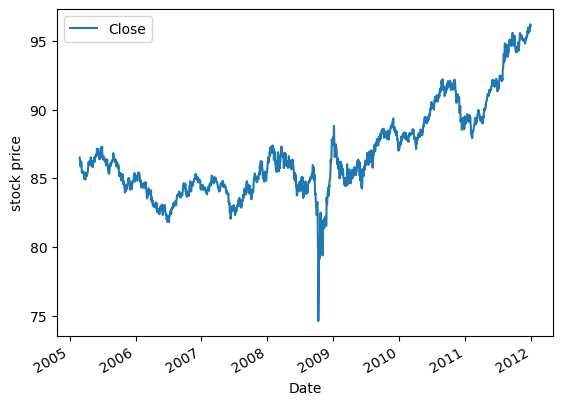

In [36]:
new_data.plot()
plt.xlabel('Date')
plt.ylabel('stock price')

2. Machine Learning Decomposition

In this part, we will check the seasonality in a period of a month and check which model is best used for this data: additive or multivariative?

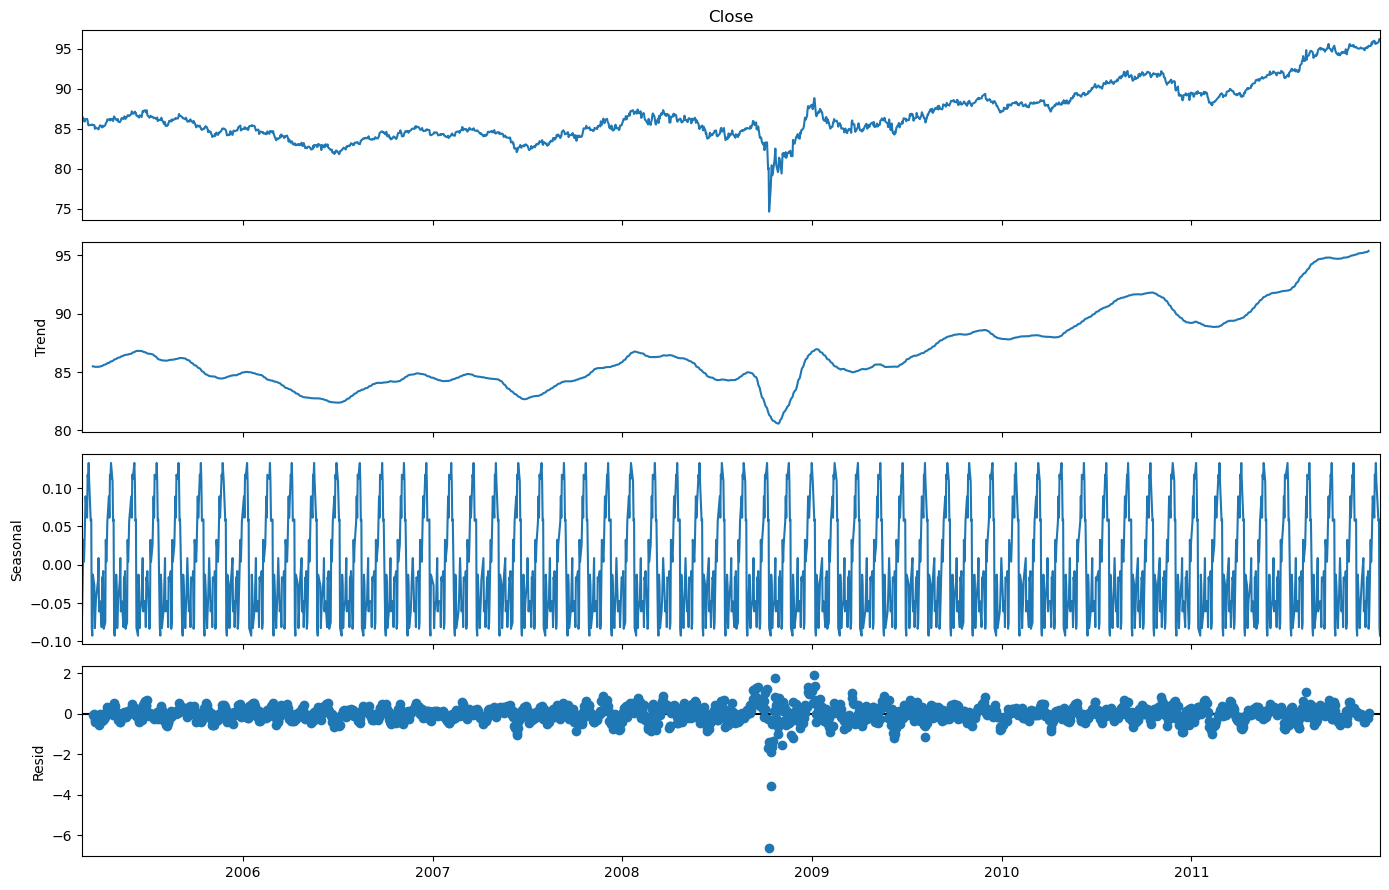

In [111]:
pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(new_data['Close'], model='additive', period=30)
ax=res.plot()
plt.show()

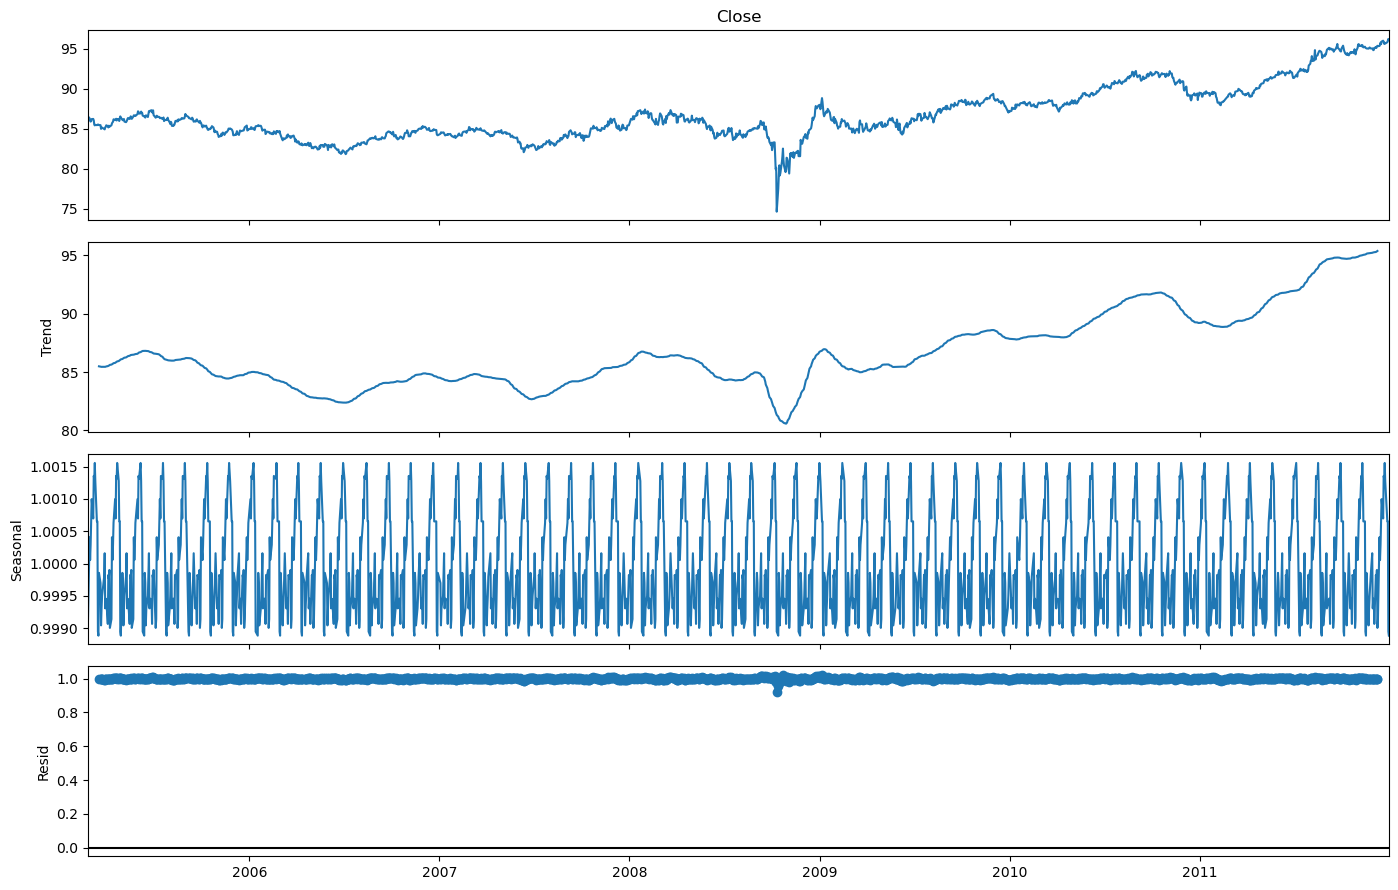

In [112]:
pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(new_data['Close'], model='multivariative', period=30)
ax=res.plot()
plt.show()

It seems from the plot above, the multivariative residuals have lower variance. Because of this, we will use multivariative model in this time series model training.

3. Stationary Test

In order to have consistent result, I need to do a stationary test for the data. As we can see from the overview, this data that I am analysing has no stationary. I copy and paste this function just to be safe:

In [39]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

> This function will be useful for us to double check the stationary using statistics

First, let's see how the data looks like without any differencing:

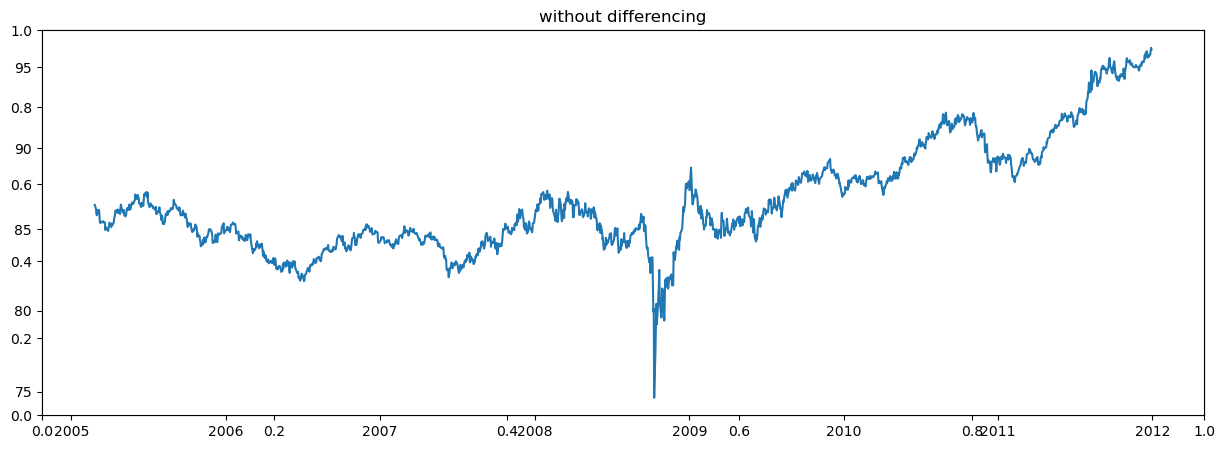

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('without differencing')
ax1.plot(new_data['Close'])

And if we take a look at the statistics:

In [41]:
check_stationarity(new_data['Close'])

ADF Statistic: -0.202574
p-value: 0.938214
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Non-stationary


> No stationary

Now let's see how the data looks like after the differencing:

In [42]:
diff1 = new_data['Close'].diff()

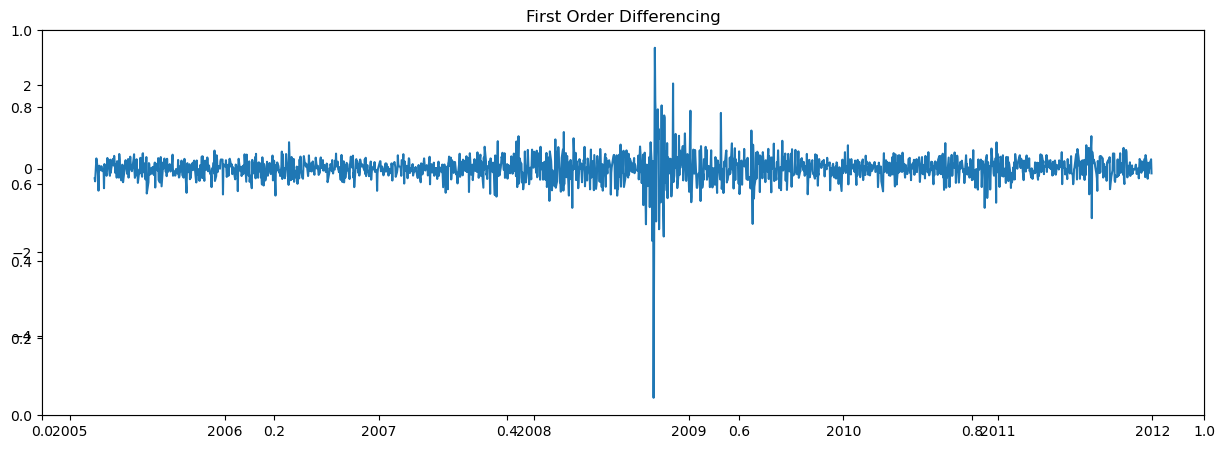

In [43]:
fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('First Order Differencing')
ax1.plot(diff1)

Graph wise, the data seems to be stationary apart from the period of monetary crisis. But let's take a look at its statistics:

In [44]:
check_stationarity(diff1.dropna())

ADF Statistic: -9.264976
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Stationary


> It's already stationary

4. ACF & PACF

In this part, we will check the p (PACF) and the q(ACF) order for out model and determine which number is appropriate:

A. Without differencing:

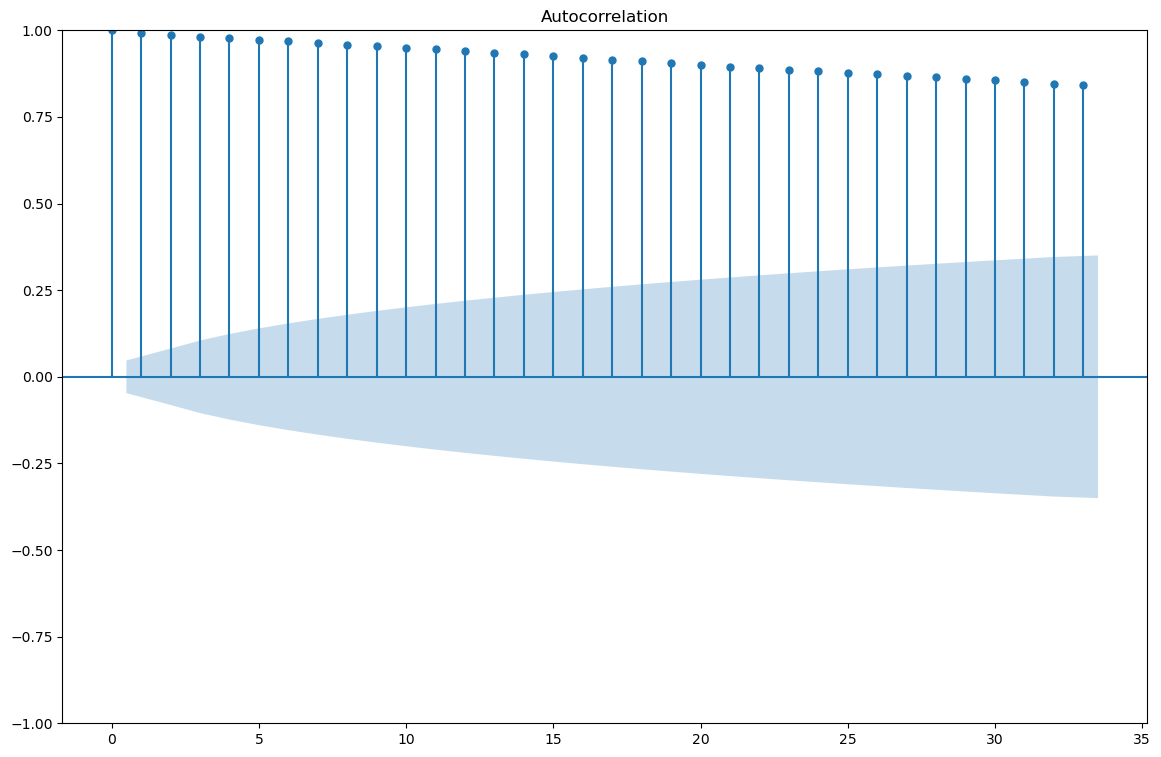

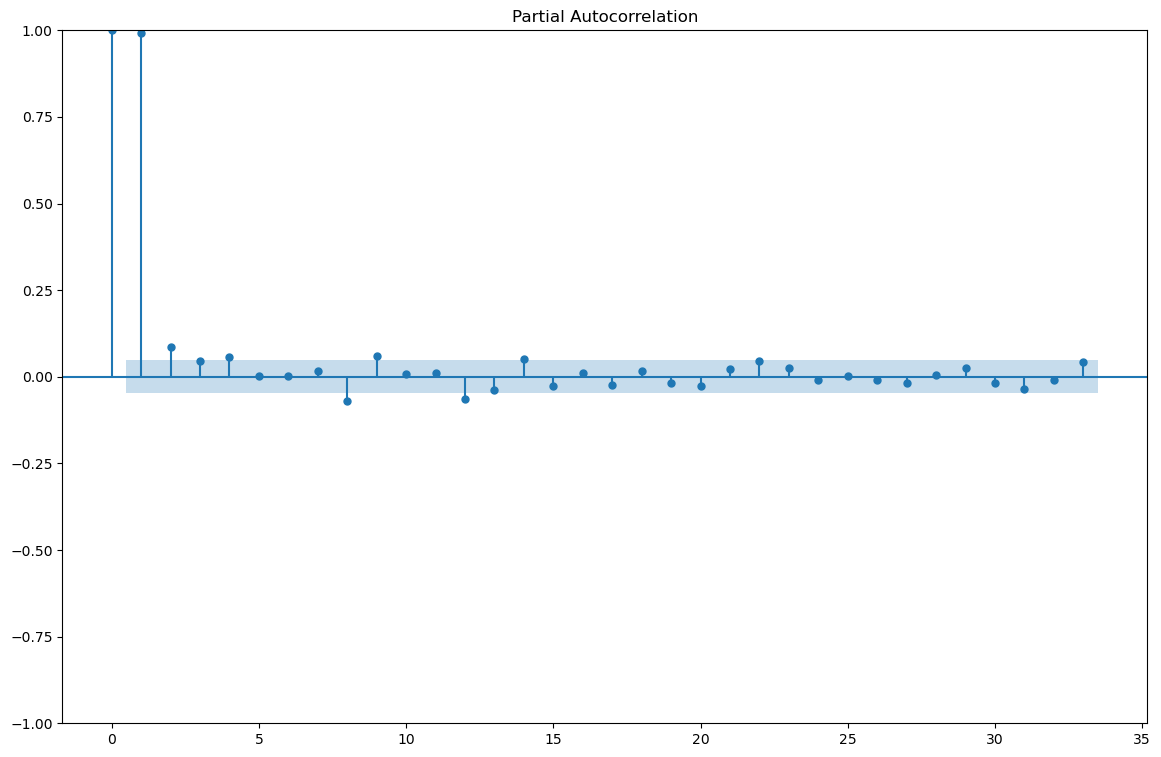

In [45]:
plot_acf(new_data['Close'])
plot_pacf(new_data['Close'])
plt.show()

> From the graph above, we can conclude that we need to use a differencing method for the model is preferrable

B. With first order differencing:

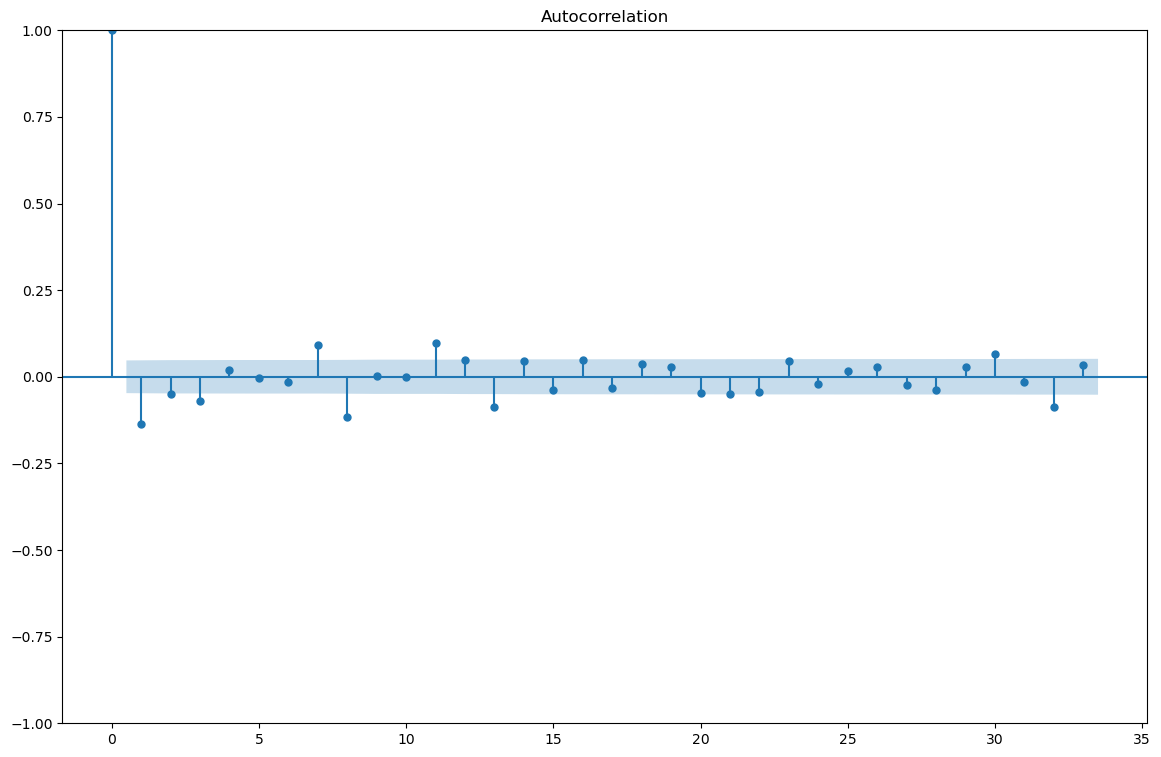

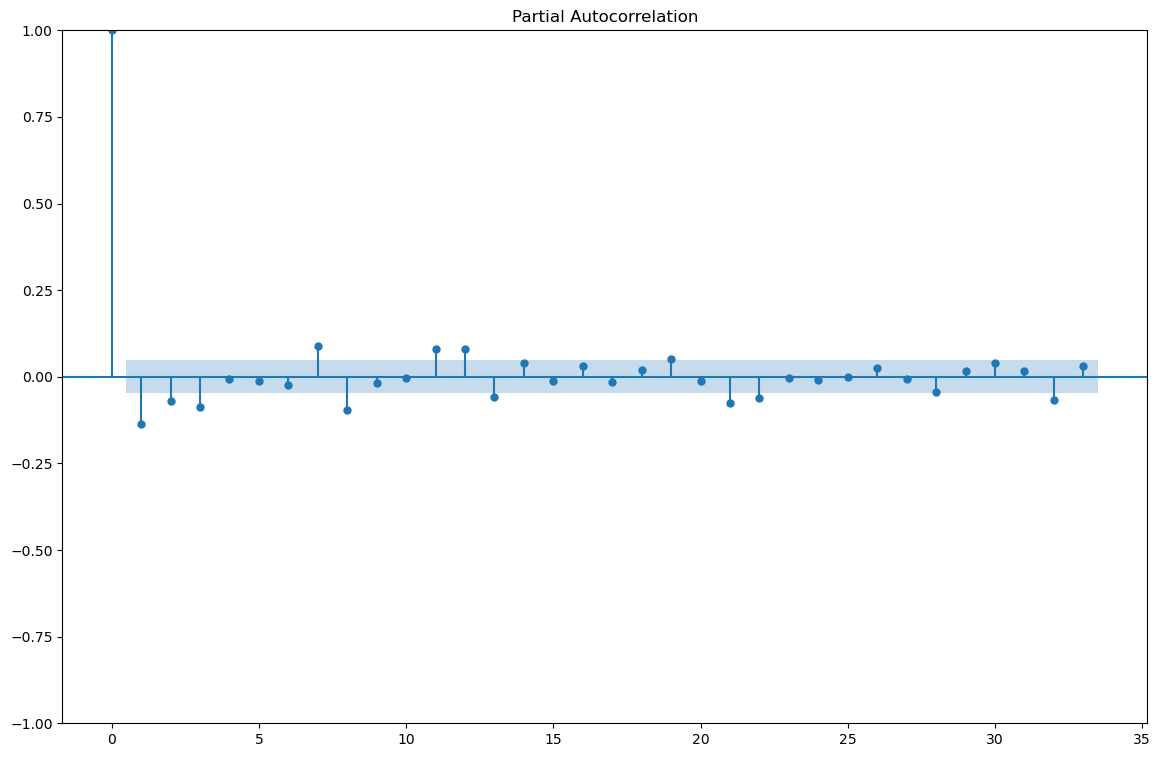

In [46]:
plot_acf(new_data['Close'].diff().dropna())
plot_pacf(new_data['Close'].diff().dropna())
plt.show()

The P and Q should be 0 according to the graph, because of this, we will create a function to find the best order for ARIMA in the model training below.

### Model Training

We will test our two model and see the result. The model that I have picked are ARIMA and SARIMA. The p,d,q order will be the same for both models.

#### ARIMA

1. Splitting

First, we need to split the data:

In [47]:
len(new_data)

1725

In [113]:
training = new_data[0:1360]
test = new_data[1360:]

Because the prediction we want is only a year. We need to make sure that the test has 365 rows.

2. Find the best model using AIC

This is the function I talked about in the ACF & PACF part of the EDA:

In [114]:
# Create a function to find best model

def find_best_model(data, num_p, num_d, num_q):
  df = pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
  pdq = [[],[],[]] #This list for storing the combinations of p and q
  aic = [] # This list for storing aic value
  for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        # #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
        try: #Using exception to avoid the error while training the model with certain p and q value
          model = ARIMA(data, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass #If there is an error caused by the calculation, it will be skipped to the next iteration

  df['p'] = pdq[0]
  df['d'] = pdq[1]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

> As you can see, to determine the best order, I use Akaike Information Criterion (AIC) Score. AIC is a metric used to compare statistical models by balancing goodness of fit and complexity. It helps you choose the best model while avoiding overfitting.

AIC = 2k-2ln(L)

where k is the of parameters in the model, while L is the maximum likelihood of the model.

In [115]:
find_best_model(training['Close'], 4,2,4)

(2,
 1,
 4,
 885.6018699723185,
     p  d  q          AIC
 39  2  1  4   885.601870
 54  3  1  4   887.599500
 49  3  0  4   890.748960
 68  4  1  3   893.279850
 69  4  1  4   893.979443
 .. .. .. ..          ...
 4   0  0  4  2180.930683
 3   0  0  3  2590.919321
 2   0  0  2  3122.729885
 1   0  0  1  4127.771687
 0   0  0  0  5662.752083
 
 [75 rows x 4 columns])

We have our order, now we just need to fit the model to our training set:

In [116]:
model_arima_214 = ARIMA(training['Close'], order=(2,1,4))
result_model_arima_214 = model_arima_214.fit()

print('The AIC is ', result_model_arima_214.aic)

The AIC is  885.6018699723185


Then, create the prediction below:

In [126]:
len_dataset = training.shape[0]
len_predict = len_dataset + 364
pred_test = result_model_arima_214.predict(len_dataset, len_predict)

In [128]:
pred_test = pd.DataFrame(pred_test)
pred_test.index = test.index
pred_test.columns = ['Close']

>Don't forget the evaluation metrics:

In [129]:
Eval_arima = {
    'Metric': ['MAE', 'MAPE'],
    'Score': [mean_absolute_error(test, pred_test), mean_absolute_percentage_error(test, pred_test)]
}
Eval_arima = pd.DataFrame(Eval_arima)

In [131]:
Eval_arima

,Metric,Score
0,MAE,1.928963
1,MAPE,0.020730


And now we plot the prediction result and compare it to the test data:

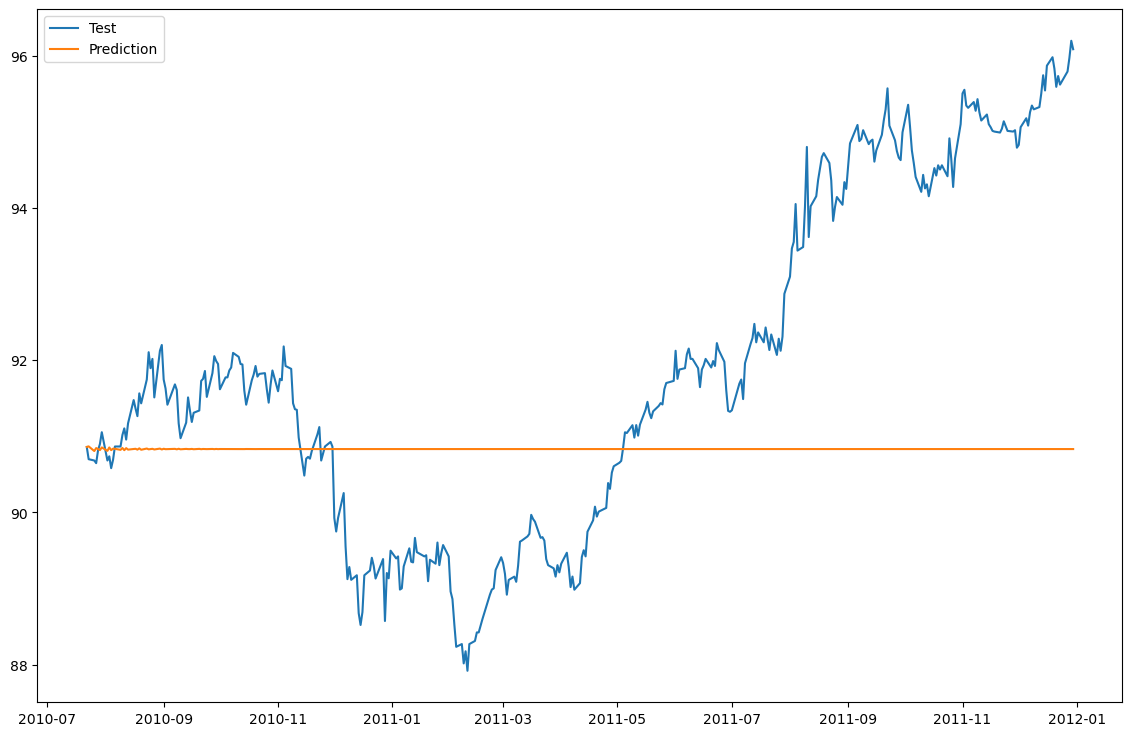

In [132]:
plt.plot(test['Close'], label='Test')
plt.plot(pred_test['Close'], label='Prediction')
plt.legend(loc='best')
plt.show()

> As we can see, the ARIMA model is unsatisfactory to predict how the stock will perform next year after 2010

#### SARIMA

Now, let's use SARIMA with the same order of p,d,q, but with seasonal order of 30 days:

In [135]:
sar=SARIMAX(training['Close'], order=(2, 1, 4),seasonal_order=(2, 1, 4, 30)).fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1360
Model:             SARIMAX(2, 1, 4)x(2, 1, 4, 30)   Log Likelihood                -477.433
Date:                            Thu, 06 Feb 2025   AIC                            980.867
Time:                                    14:20:02   BIC                           1048.365
Sample:                                         0   HQIC                          1006.165
                                           - 1360                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6470      0.035    -47.150      0.000      -1.715      -1.579
ar.L2         -0.8646      0.036    -23.993      0.000      -0.935      -0.794
ma.L1          1.5034      0.035     42.418      0.000       1.434       1.573
ma.L2          0.5605      0.035     16.041      0.000       0.492       0.629
ma.L3         -0.3130      0.020    -15.369      0.000      -0.353      -0.273
ma.L4         -0.1439      0.013    -11.085      0.000      -0.169      -0.118
ar.S.L30      -1.9504      1.189     -1.640      0.101      -4.281       0.380
ar.S.L60      -0.9821      1.235     -0.796      0.426      -3.402       1.438
ma.S.L30       1.0059      2.484      0.405      0.685      -3.862       5.874
ma.S.L60      -0.9175      4.712     -0.195      0.846     -10.152       8.317
ma.S.L90      -1.0361      3.021     -0.343      0.732      -6.956       4.884
ma.S.L120     -0.0523      0.158     -0.331      0.741      -0.362       0.258
sigma2         0.1104      0.261      0.423      0.672      -0.401       0.621
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            225646.05
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.28   Skew:                            -3.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The AIC seems to be bigger than the previous model, but we still need to proceed with the prediction:

In [144]:
sar_pred_test = sar.predict(start=len(training), end=len(training) + len(test) - 1, dynamic=True)
sar_pred_test = pd.DataFrame(sar_pred_test)
sar_pred_test.columns = ['Close_predict']
sar_pred_test.index = test.index

## Concate with actual test-set
act_vs_pred_sar=pd.concat([test, sar_pred_test], axis=1)

> Do not forget to save the metrics either:

In [145]:
Eval_sarima = {
    'Metric': ['MAE', 'MAPE'],
    'Score': [mean_absolute_error(test, sar_pred_test), mean_absolute_percentage_error(test, sar_pred_test)]
}
Eval_sarima = pd.DataFrame(Eval_sarima)

Now let's take a look at the model graphically:

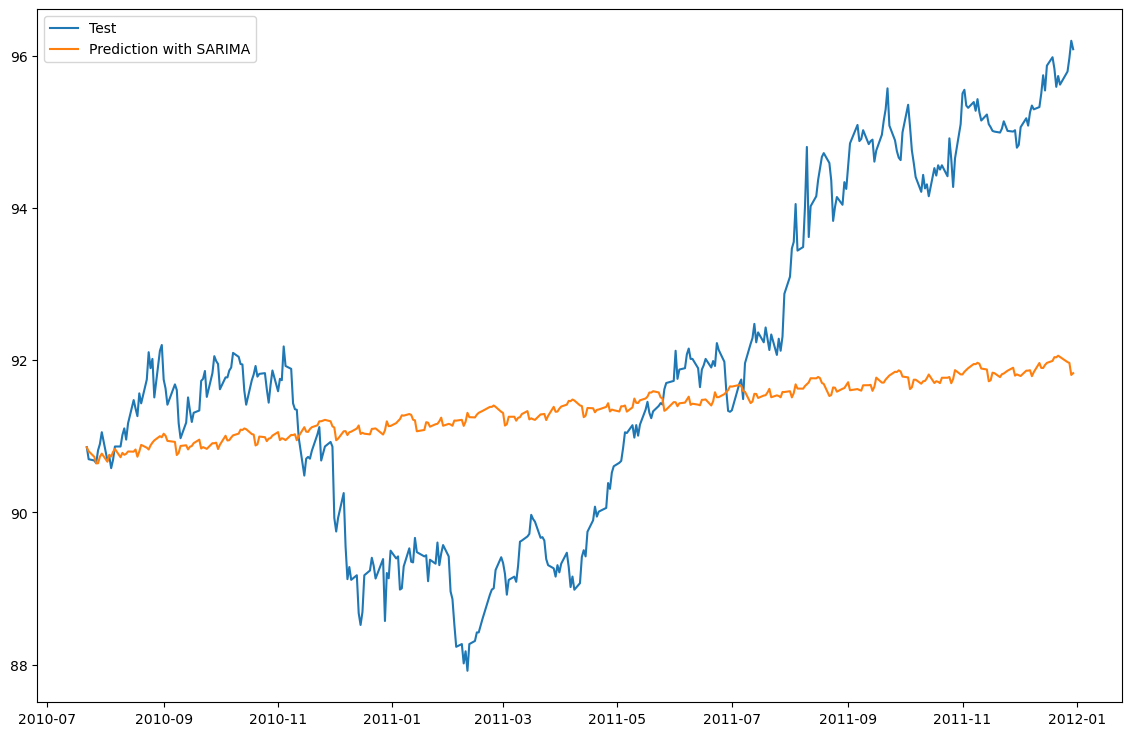

In [146]:
plt.plot(test['Close'], label='Test')
plt.plot(sar_pred_test['Close_predict'], label='Prediction with SARIMA')
plt.legend(loc='best')
plt.show()

Graphically this seems better, but let's compare it to the model with the metrics of MAE and MAPE:

In [147]:
Eval_sarima

,Metric,Score
0,MAE,1.674107
1,MAPE,0.018089


In [148]:
Eval_arima

,Metric,Score
0,MAE,1.928963
1,MAPE,0.020730


Means Absolute Error is a metric that takes the absolute value of each error, while Means Absolute Percentage Error takes the percentage value of each error occured in either the prediction and the actual testing data.

From the MAE and MAPE metrics above, we can say that the SARIMA model is better for the stock market prediction. Now, let's see the overall new data we have used:

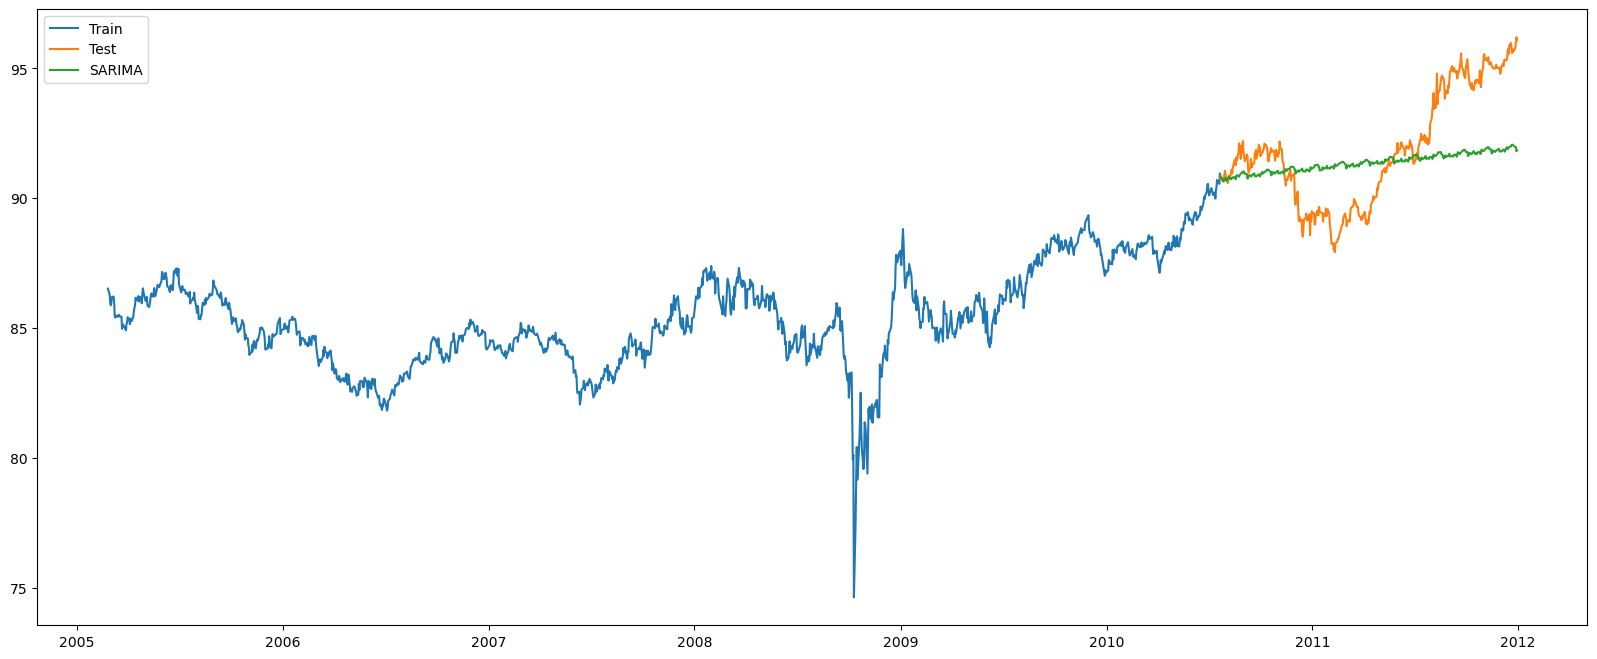

In [149]:
plt.figure(figsize=(20,8))
plt.plot(training['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(sar_pred_test['Close_predict'], label='SARIMA')
plt.legend(loc='best')
plt.show()

Although not 100% accurate, the SARIMA model can predict an upward trend of how the stock moves. This model can convince the investors to invest in AGG Power Solutions after 2010

### Result Saving

In [150]:
act_vs_pred_sar.to_csv('prediction_result.csv')

### Part 2 Conclusion
We have successfully created a satisfactory prediction of how the stock is going to look like a year after 2010, which is the 2 years recovery period after the company faced the financial crisis. The PACF and ACF order can only be received after we create a function to find the best order using AIC as the metrics. For future model improvement, we can use 365 days as a seasonal order for SARIMA but of course, it will take more time and resources compared to using only 30 days. If the investors at that time were to invest in this company, they would make a good decision in doing so!!